# NLP Project- Language Detection

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('D:\Research\_KLU\Programs implemented so far\Language Detection_NLP\Language Detection.csv') #upload dataset
df.head()

In [3]:
# Method to remove all punctuation marks
def remove_pun(text):
    for pun in string.punctuation:
        text = text.replace(pun,"")
    text = text.lower()
    return text

In [4]:
df['Text'] = df['Text'].apply(remove_pun) #involking the method to remove punctuation marks from text field
df.head()

,Text,Language
0,nature in the broadest sense is the natural p...,English
1,nature can refer to the phenomena of the physi...,English
2,the study of nature is a large if not the only...,English
3,although humans are part of nature human activ...,English
4,1 the word nature is borrowed from the old fre...,English


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.iloc[:,0] #extracing all rows and 0th column
Y = df.iloc[:,1] #extracing all rows and 1st column

In [7]:
X #extracted all the Text in X variable

0         nature in the broadest sense is the natural p...
1        nature can refer to the phenomena of the physi...
2        the study of nature is a large if not the only...
3        although humans are part of nature human activ...
4        1 the word nature is borrowed from the old fre...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ  ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 10337, dtype: object

In [8]:
Y #extracted all the Languages in Y variable

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10337, dtype: object

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)

In [10]:
X_train.shape, X_test.shape

((8269,), (2068,))

In [11]:
# importing necessaring libraries for vectorization, model building and pipeline from scikitlearn module
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import pipeline

In [12]:
vec = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2),analyzer='char') #unigram & bigram

In [13]:
model_vec_pipe = pipeline.Pipeline([('vec',vec),('clf',linear_model.LogisticRegression())]) #creating a pipeline of vectorizer and model

In [14]:
model_vec_pipe.fit(X_train,y_train)

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('clf', LogisticRegression())])

In [15]:
predicted = model_vec_pipe.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
accuracy_score(y_test,predicted)*100
cm = confusion_matrix(y_test,predicted)

[Text(0, 0.5, 'English'),
 Text(0, 1.5, 'Malayalam'),
 Text(0, 2.5, 'Hindi'),
 Text(0, 3.5, 'Tamil'),
 Text(0, 4.5, 'Portugeese'),
 Text(0, 5.5, 'French'),
 Text(0, 6.5, 'Dutch'),
 Text(0, 7.5, 'Spanish'),
 Text(0, 8.5, 'Greek'),
 Text(0, 9.5, 'Russian'),
 Text(0, 10.5, 'Danish'),
 Text(0, 11.5, 'Italian'),
 Text(0, 12.5, 'Turkish'),
 Text(0, 13.5, 'Sweedish'),
 Text(0, 14.5, 'Arabic'),
 Text(0, 15.5, 'German'),
 Text(0, 16.5, 'Kannada')]

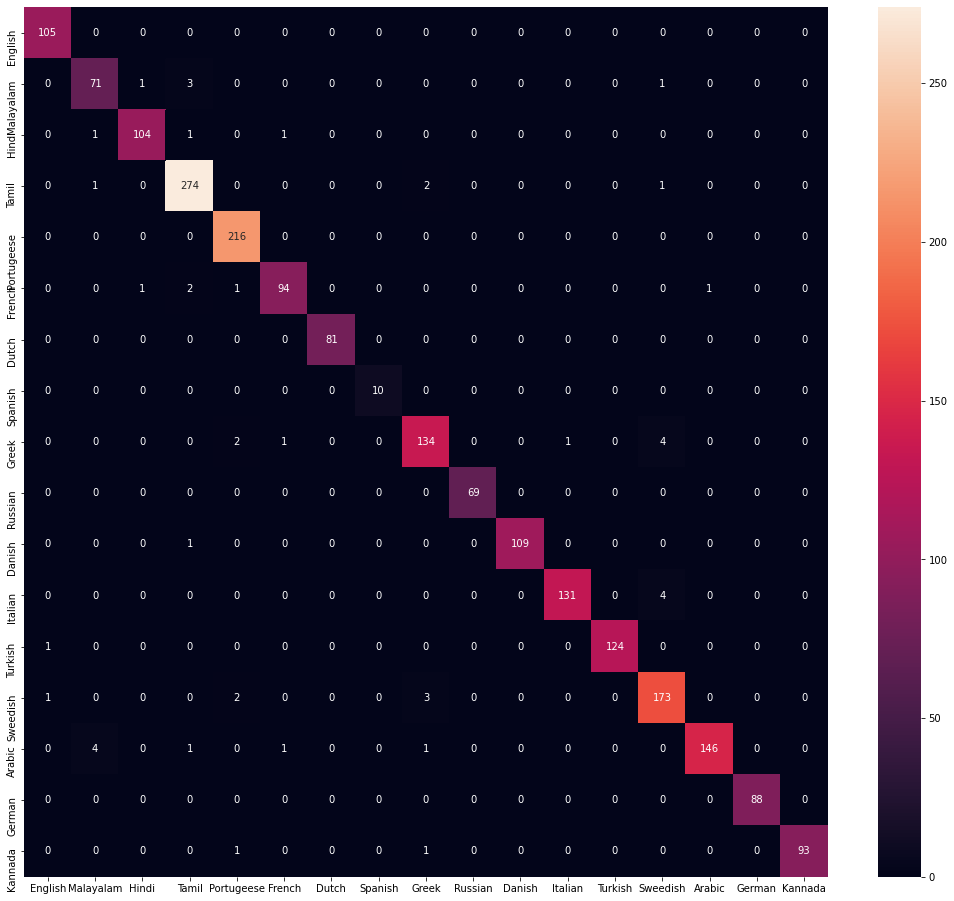

In [18]:
plt.figure(figsize = (18,16))
s = sns.heatmap(cm, annot=True, fmt='')
s.xaxis.set_ticklabels(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French','Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian','Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'])
s.yaxis.set_ticklabels(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French','Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian','Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'])

In [19]:
model_vec_pipe.predict(['Hello there , My name is Farhana.'])

array(['English'], dtype=object)

In [20]:
import pickle
new_file = open('model.pckl','wb')
pickle.dump(model_vec_pipe,new_file)
new_file.close()